## About Dataset :
 The estimation of calories burned by individuals is based on a formula and MET charts. This study aims to predict the calories burned using a regression model as one of the machine learning algorithms to give more accurate results. Data preparation, cleaning, and analysis are the primary steps before they can be fed to the regression models.bold text

# Attribute Information 


1. Gender: Male|Female
2. Age:   Age of the person
3. Height: Height of the person
4. Weight: Weight of the person
5. Duration: Duration of the workout
6. Heart_Rate: Count of heart beat during the workout
7. Body_Temp: Body temperature during the workout
8. Calories: Amount of the calories

# Importing the Dependencies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

Data collection & Processing

In [30]:
# loading  and printing the data from csv file to a pandas  Dataframe
df1=pd.read_csv('/content/calories.csv') 
df1

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [31]:
df2=pd.read_csv('/content/exercise.csv')
df2

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


# Combining the two Dataframes

In [32]:
df=pd.concat([df2,df1['Calories']],axis=1)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [33]:
# checking the number of raws and colomns
df.shape

(15000, 9)

In [34]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [35]:
#checking the missing value
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [65]:
#to check which type of data
df.dtypes

User_ID         int64
Gender          int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

# Data Analysis

In [36]:
# to get statistical measures about data
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [37]:
sns.set()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

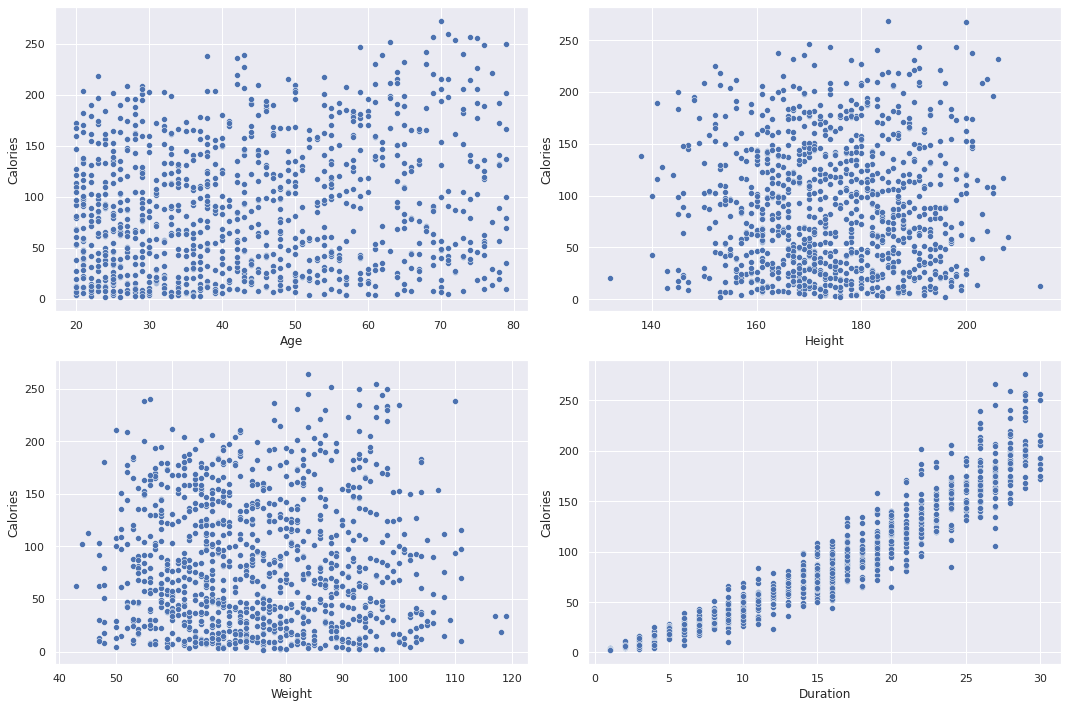

In [38]:
features = ['Age', 'Height', 'Weight', 'Duration']
  
plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sns.scatterplot(x[col], x['Calories'])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


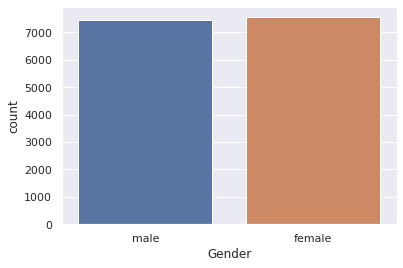

In [39]:
#plotting the gender column in count plot
sns.countplot(df['Gender'])

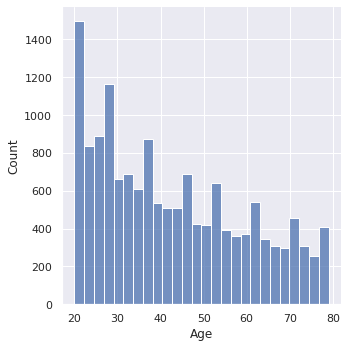

In [40]:
# finding the distribution of age column
sns.displot(df['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


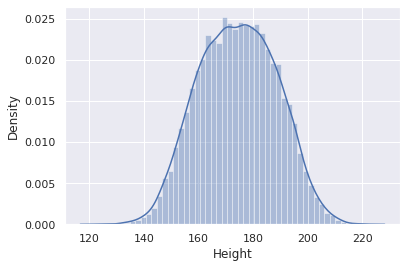

In [41]:
# finding the distribution of Height column
sns.distplot(df['Height'])

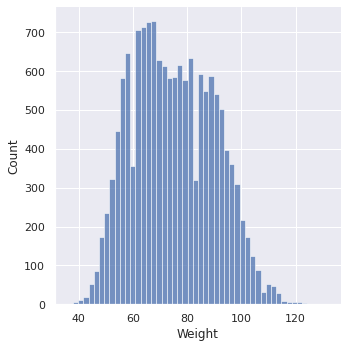

In [42]:
# finding the distribution of weight column
sns.displot(df['Weight'])

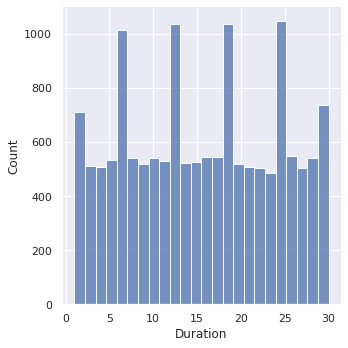

In [43]:
# finding the distribution of 	Duration  column
sns.displot(df['Duration'])

# finding the correlation in the dataset
1.postive correlation
2.Negative correlation

In [44]:
correlation=df.corr()

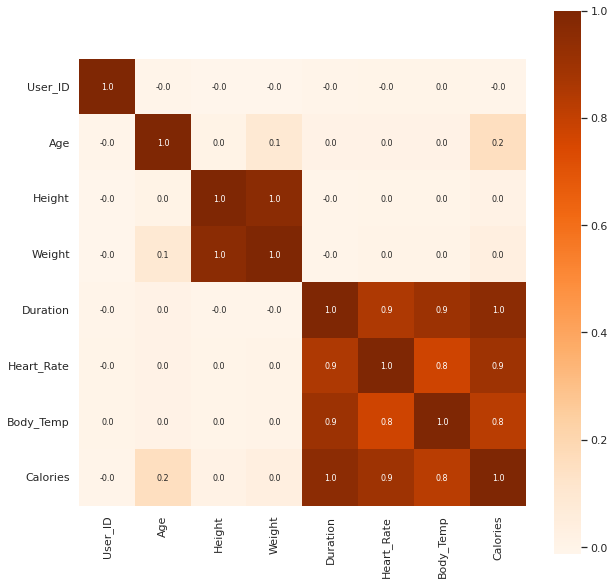

In [45]:
#construction of  heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap='Oranges')

#converting the text data to numeric values

In [46]:
df.replace({"Gender":{'male':0,'female':1}},inplace=True)
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [47]:
df3=df.drop(columns=['User_ID'],axis=1)
df3

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,0,78,193.0,97.0,2.0,84.0,38.3,11.0


#separating features and target

In [48]:
X=df3.iloc[:,:-1].values
X

array([[  0. ,  68. , 190. , ...,  29. , 105. ,  40.8],
       [  1. ,  20. , 166. , ...,  14. ,  94. ,  40.3],
       [  0. ,  69. , 179. , ...,   5. ,  88. ,  38.7],
       ...,
       [  1. ,  43. , 159. , ...,  16. ,  90. ,  40.1],
       [  0. ,  78. , 193. , ...,   2. ,  84. ,  38.3],
       [  0. ,  63. , 173. , ...,  18. ,  92. ,  40.5]])

In [49]:
y=df3.iloc[:,-1].values
y

array([231.,  66.,  26., ...,  75.,  11.,  98.])

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X.shape

(15000, 7)

In [51]:
X_train.shape

(12000, 7)

In [52]:
X_test.shape

(3000, 7)

In [53]:
X_train.shape

(12000, 7)

In [54]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_new=sc.fit_transform(X_train)
X_test_new=sc.transform(X_test)
X_train_new
X_test_new 

array([[ 0.9905447 , -0.09739196, -0.16973303, ...,  1.01487045,
         0.25730804,  0.98991621],
       [-1.00954556,  1.61356783,  1.02207293, ...,  1.01487045,
         1.81690824,  1.11814509],
       [ 0.9905447 ,  0.6105914 , -0.0996268 , ..., -1.02678008,
         0.04936135, -0.93351688],
       ...,
       [ 0.9905447 ,  0.84658585, -1.01100783, ...,  0.89477336,
         0.77717477,  0.22054298],
       [ 0.9905447 ,  0.90558447, -0.23983927, ..., -1.14687717,
        -1.40626551, -0.80528801],
       [ 0.9905447 ,  1.14157892,  0.04058567, ...,  0.17419082,
        -0.15858535,  0.34877185]])

# model training

#XGbooster Regressor

In [55]:
#loading the model and training the model with x_test
xgb=XGBRegressor()
xgb.fit(X_train_new,y_train)
test_data_prediction=xgb.predict(X_test_new)
test_data_prediction

[08:11:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([129.06204 , 223.79721 ,  39.181965, ..., 145.59767 ,  22.53474 ,
        92.29064 ], dtype=float32)

Mean Absolute Error 

In [56]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  2.7159012502233186


#Linear Regression

In [57]:
lrg=LinearRegression()
lrg.fit(X_train_new,y_train)
test_data_prediction=lrg.predict(X_test_new)
test_data_prediction

array([137.49241057, 182.18166512,  50.15864741, ..., 157.56637167,
        16.54924422, 100.21047087])

Mean Absolute Error

In [58]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  8.385188053147184


#RandomForestRegressor

In [59]:
rfg=RandomForestRegressor()
rfg.fit(X_train_new,y_train)
test_data_prediction=rfg.predict(X_test_new)
test_data_prediction

array([127.52, 224.59,  36.65, ..., 145.53,  24.12,  89.41])

Mean Absolute Error

In [60]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  1.6826600000000003


#Lasso

In [61]:
ls=Lasso()
ls.fit(X_train_new,y_train)
test_data_prediction=ls.predict(X_test_new)
test_data_prediction

array([136.78434121, 179.25600927,  51.09352763, ..., 150.1414618 ,
        20.61809143, 102.27668255])

Mean Absolute Error

In [62]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean absolute error =",mae)

Mean absolute error = 8.989469141792537


#Ridge

In [63]:
rg=Ridge()
rg.fit(X_train_new,y_train)
test_data_prediction=rg.predict(X_test_new)
test_data_prediction

array([137.48208579, 182.1870962 ,  50.17294145, ..., 157.54412068,
        16.55925798, 100.2146924 ])

Mean Absolute Error

In [64]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error =",mae)

Mean Absolute Error = 8.384821966003726


**RESULTS**                                           


XGBooster Regressor()  :                         
Mean Absolute Error : 2.715


Linear Regression() :                 
Mean Absolute Error : 8.385


RandomForestRegressor() :                    
Mean Absolute Error   : 1.689


Lasso() :     
Mean Absolute Error : 8.989


Ridge() :                                 
Mean Absolute Error :8.384                














 






**Conclusion:**                                                                                                            
   






while using all this algorithm   the Mean Absolute Error is lesser in RandomForestRegressor by comparing to others